In [1]:
# EXPERIMENTAL: THIS NOTEBOOK TRAINS THE RNN LSTM

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import numpy as np
from data_loader import DataLoader
from utils.visualize import show_images_in_grid, show_images_as_video, show_reconstructions, compare_images_as_video
from cnn import Autoencoder
from rnn_initial_state import Seq2Seq
import random

Using TensorFlow backend.
/home/abhi/anaconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/abhi/anaconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/abhi/anaconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/abhi/anaconda3

In [4]:
root = os.getcwd()
rnn_train_dir = root+"/../datasets/training_set/data/rnn.npy"
rnn_test_dir = root+"/../datasets/test_set/data/rnn.npy"

In [5]:
# WE WON'T USE THE TEST DATA AT ALL AND INSTEAD SPLIT THE TRAIN DATA INTO TRAIN, TEST, AND VALIDATION DATASETS WITH THE DATA LOADER

In [6]:
rnn_data_loader = DataLoader(features_dir=rnn_train_dir, labels_dir=rnn_train_dir)

In [7]:
rnn_data_loader.split_train_val_test(train=0.7, val=0.2, test=0.1)

In [8]:
# NORMALIZE ALL PIXEL VALUES FROM 0-255 TO O-1

In [9]:
rnn_data_loader.preprocess(rescale=True)

In [6]:
ae = Autoencoder()
ae.build_model(input_dim=(28, 28, 3), latent_dim=(64,))
ae.set_weights(root+"/../models/autoencoder.h5")

Instructions for updating:
Colocations handled automatically by placer.


In [154]:
np.save(root+"/X_train.npy", rnn_data_loader.X_train)
np.save(root+"/X_val.npy", rnn_data_loader.X_val)
np.save(root+"/X_test.npy", rnn_data_loader.X_test)

In [7]:
X_train = np.load(root+"/X_train.npy")
X_val = np.load(root+"/X_val.npy")
X_test = np.load(root+"/X_test.npy")

In [7]:
X_train = ae.encode_series(rnn_data_loader.X_train)
X_val = ae.encode_series(rnn_data_loader.X_val)
X_test = ae.encode_series(rnn_data_loader.X_test)

NameError: name 'rnn_data_loader' is not defined

In [8]:
X_train = ae.encode_series(X_train)
X_val = ae.encode_series(X_val)
X_test = ae.encode_series(X_test)

In [9]:
X_train.shape

(84, 105, 64)

In [10]:
seq = Seq2Seq()
seq.build_model(input_dim=64, output_dim=64)

In [11]:
seq.set_weights(root+"/../models/seq2seq_initial_state_v2.h5")

In [12]:
seq.model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                [(None, None, 1024), (Non 4460544   
_________________________________________________________________
dense_4 (Dense)              (None, None, 64)          65600     
Total params: 4,526,144
Trainable params: 4,526,144
Non-trainable params: 0
_________________________________________________________________


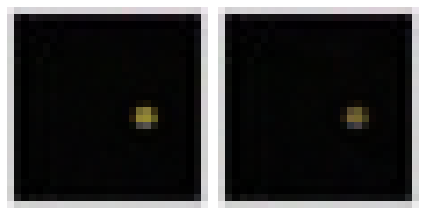

EPOCH 501
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 8.6849 - val_loss: 332.3224
EPOCH 502
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 8.6737 - val_loss: 332.5024
EPOCH 503
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 995us/step - loss: 8.6622 - val_loss: 332.9166
EPOCH 504
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 8.6446 - val_loss: 332.5779
EPOCH 505
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 8.6488 - val_loss: 332.9663
EPOCH 506
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 8.6455 - val_loss: 333.1501
EPOCH 507
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [=========

EPOCH 608
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 7.6858 - val_loss: 343.1938
EPOCH 609
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 7.6854 - val_loss: 343.0220
EPOCH 610
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 7.7056 - val_loss: 342.6826
EPOCH 611
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 7.6722 - val_loss: 343.7859
EPOCH 612
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 7.6772 - val_loss: 343.5912
EPOCH 613
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 7.6436 - val_loss: 342.5477
EPOCH 614
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [===========

84/84 [==============================] - 0s 1ms/step - loss: 7.2469 - val_loss: 347.3205
EPOCH 662
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 7.2226 - val_loss: 347.4317
EPOCH 663
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 7.2139 - val_loss: 347.0331
EPOCH 664
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 7.2144 - val_loss: 347.8287
EPOCH 665
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 7.2016 - val_loss: 347.5814
EPOCH 666
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 7.1842 - val_loss: 347.2021
EPOCH 667
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 7.1955 - val_loss: 34

EPOCH 715
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 6.9123 - val_loss: 352.5681
EPOCH 716
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 6.9117 - val_loss: 352.0677
EPOCH 717
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 6.9157 - val_loss: 352.3920
EPOCH 718
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 6.8854 - val_loss: 352.9704
EPOCH 719
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 6.8781 - val_loss: 351.7271
EPOCH 720
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 6.8497 - val_loss: 352.8829
EPOCH 721
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [===========

EPOCH 822
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 6.0495 - val_loss: 359.8735
EPOCH 823
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 6.0413 - val_loss: 360.2648
EPOCH 824
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 6.0060 - val_loss: 360.5676
EPOCH 825
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 5.9632 - val_loss: 360.3853
EPOCH 826
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 5.9367 - val_loss: 360.5067
EPOCH 827
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 5.9211 - val_loss: 360.3800
EPOCH 828
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [===========

EPOCH 929
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 5.2123 - val_loss: 367.8329
EPOCH 930
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 5.2151 - val_loss: 368.3781
EPOCH 931
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 5.2067 - val_loss: 368.3372
EPOCH 932
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 992us/step - loss: 5.1909 - val_loss: 368.1277
EPOCH 933
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 5.1837 - val_loss: 368.5583
EPOCH 934
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [==============================] - 0s 1ms/step - loss: 5.1774 - val_loss: 368.9295
EPOCH 935
Train on 84 samples, validate on 24 samples
Epoch 1/1
84/84 [=========

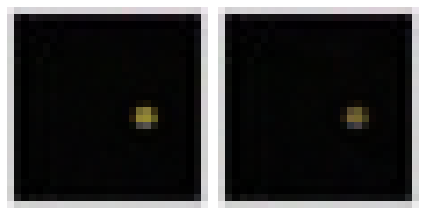

In [113]:
# TRAIN LOOP
for epoch in range(1000):
    print('EPOCH %d' % (epoch))
    seq.train(X_train=X_train[:, :49, :], 
             Y_train=X_train[:, 1:50, :], 
             X_val=X_val[:, :49, :], 
             Y_val=X_val[:, 1:50, :], 
             epochs=1, 
             batch_size=32
             )
    if epoch % 500 == 0:
        i = random.randint(0, X_train.shape[0]-1)
        X, Y = [], []
        x = X_train[i, :49, :]
        X.append(x)
        X = np.array(X)
        y = X_train[i, 1:50, :]
        Y.append(y)
        Y = np.array(Y)
        Y_hat = seq.model.predict(X)
        Y_decoded = ae.decode_series(Y)
        Y_hat_decoded = ae.decode_series(Y_hat)
        compare_images_as_video(Y_decoded[0], Y_hat_decoded[0])
    seq.save_weights(root+"/../models/seq2seq_initial_state_v2.h5")

In [13]:
def produce_videos_new(train=True, val=False, test=False, i=None):
    if i == None:
        if train:
            i = random.randint(0, X_train.shape[0]-1)
        elif val:
            i = random.randint(0, X_val.shape[0]-1)
        elif test:
            i = random.randint(0, X_test.shape[0]-1)
    X, Y = [], []
    x, y = None, None
    h, c = np.array([np.zeros(1024)]), np.array([np.zeros(1024)])
    if train:
        x = X_train[i, 0, :]
        y = X_train[i, 1:51, :]
    elif val:
        x = X_val[i, 0, :]
        y = X_val[i, 1:51, :]
    elif test:
        x = X_test[i, 0, :]
        y = X_test[i, 1:51, :]
    
    x = np.expand_dims(x, axis=0)
    x = np.expand_dims(x, axis=1)
    for _ in range(100):
        x_new, h_new, c_new = seq.forward.predict([x, h, c])
        # print(x_new.shape, h_new.shape, c_new.shape)
        # print(x_new.shape)
        X.append(x_new)
        x, h, c = x_new, h_new, c_new
        
    X = np.array(X)
    Y.append(y)
    Y = np.array(Y)
    X = np.reshape(X, (1, 100, 64))
    print(X.shape)
    print(Y.shape)
    Y_hat_decoded = ae.decode_series(X)
    Y_decoded = ae.decode_series(Y)
    print(Y_decoded.shape)
    print(Y_hat_decoded.shape)
#     result = np.concatenate((X, Y), axis=1)
#     Y_decoded = ae.decode_series(result)
    return Y_decoded[0], Y_hat_decoded[0], i

In [14]:
def produce_videos_new_two(train=True, val=False, test=False, i=None):
    if i == None:
        if train:
            i = random.randint(0, X_train.shape[0]-1)
        elif val:
            i = random.randint(0, X_val.shape[0]-1)
        elif test:
            i = random.randint(0, X_test.shape[0]-1)
    X, Y = [], []
    x, y = None, None
    h, c = np.array([np.zeros(1024)]), np.array([np.zeros(1024)])
    if train:
        x = X_train[i, 0, :]
        y = X_train[i, 1:51, :]
    elif val:
        x = X_val[i, 0, :]
        y = X_val[i, 1:51, :]
    elif test:
        x = X_test[i, 0, :]
        y = X_test[i, 1:51, :]
    
    x = np.expand_dims(x, axis=0)
    x = np.expand_dims(x, axis=1)
    for _ in range(100):
        x_new = seq.model.predict(x)
        # print(x_new.shape, h_new.shape, c_new.shape)
        # print(x_new.shape)
        X.append(x_new)
        x = x_new
        
    X = np.array(X)
    Y.append(y)
    Y = np.array(Y)
    X = np.reshape(X, (1, 100, 64))
    print(X.shape)
    print(Y.shape)
    Y_hat_decoded = ae.decode_series(X)
    Y_decoded = ae.decode_series(Y)
    print(Y_decoded.shape)
    print(Y_hat_decoded.shape)
#     result = np.concatenate((X, Y), axis=1)
#     Y_decoded = ae.decode_series(result)
    return Y_decoded[0], Y_hat_decoded[0], i

In [15]:
def produce_videos_new_three(train=True, val=False, test=False, i=None):
    if i == None:
        if train:
            i = random.randint(0, X_train.shape[0]-1)
        elif val:
            i = random.randint(0, X_val.shape[0]-1)
        elif test:
            i = random.randint(0, X_test.shape[0]-1)
    X, Y = [], []
    x, y = None, None
    h, c = np.array([np.zeros(1024)]), np.array([np.zeros(1024)])
    if train:
        x = X_train[i, 0, :]
        y = X_train[i, 1:51, :]
    elif val:
        x = X_val[i, 0, :]
        y = X_val[i, 1:51, :]
    elif test:
        x = X_test[i, 0, :]
        y = X_test[i, 1:51, :]
    

    for j in range(50):
        x = np.expand_dims(x, axis=0)
        x = np.expand_dims(x, axis=1)
        x_new, h_new, c_new = seq.forward.predict([x, h, c])
        # print(x_new.shape, h_new.shape, c_new.shape)
        # print(x_new.shape)
        X.append(x_new)
        x, h, c = X_train[i, j+1, :], h_new, c_new
        
    X = np.array(X)
    Y.append(y)
    Y = np.array(Y)
    X = np.reshape(X, (1, 50, 64))
    print(X.shape)
    print(Y.shape)
    Y_hat_decoded = ae.decode_series(X)
    Y_decoded = ae.decode_series(Y)
    print(Y_decoded.shape)
    print(Y_hat_decoded.shape)
#     result = np.concatenate((X, Y), axis=1)
#     Y_decoded = ae.decode_series(result)
    return Y_decoded[0], Y_hat_decoded[0], i

In [16]:
def produce_videos(train=True, val=False, test=False, i=None):
    if i == None:
        if train:
            i = random.randint(0, X_train.shape[0]-1)
        elif val:
            i = random.randint(0, X_val.shape[0]-1)
        elif test:
            i = random.randint(0, X_test.shape[0]-1)
    X, Y = [], []
    x, y = None, None
    if train:
        x = X_train[i, :49, :]
        y = X_train[i, 1:50, :]
    elif val:
        x = X_val[i, :49, :]
        y = X_val[i, 1:50, :]
    elif test:
        x = X_test[i, :49, :]
        y = X_test[i, 1:50, :]
    X.append(x)
    X = np.array(X)
    Y.append(y)
    Y = np.array(Y)
    Y_hat = seq.model.predict(X)
    Y_hat_decoded = ae.decode_series(Y_hat)
    Y_decoded = ae.decode_series(Y)
    return Y_decoded[0], Y_hat_decoded[0], i

In [22]:
Y, Y_hat, i = produce_videos_new(train=True, i=18)
print(i)
# i = 18, 55, 

(1, 100, 64)
(1, 50, 64)
(1, 50, 28, 28, 3)
(1, 100, 28, 28, 3)
18


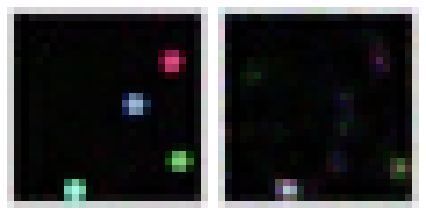

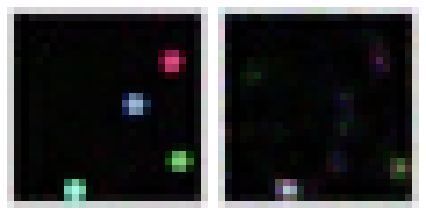

In [23]:
# show_images_as_video(Y_hat)
compare_images_as_video(Y[0:50, :], Y_hat[0:50, :])

In [20]:
Y, Y_hat, i = produce_videos_new_two(train=True, i=18)
print(i)

(1, 100, 64)
(1, 50, 64)
(1, 50, 28, 28, 3)
(1, 100, 28, 28, 3)
18


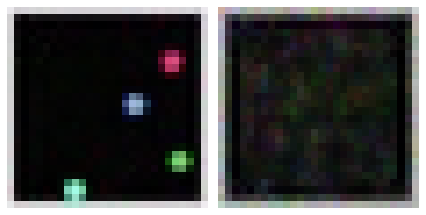

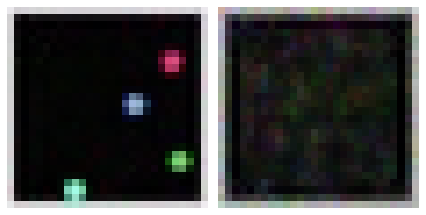

In [21]:
compare_images_as_video(Y[0:50, :], Y_hat[0:50, :])

In [24]:
Y, Y_hat, i = produce_videos_new_three(train=True, i=18)
print(i)

(1, 50, 64)
(1, 50, 64)
(1, 50, 28, 28, 3)
(1, 50, 28, 28, 3)
18


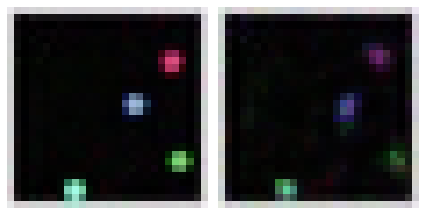

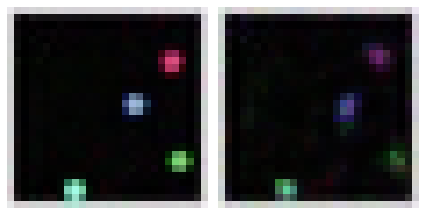

In [25]:
compare_images_as_video(Y[0:50, :], Y_hat[0:50, :])

In [26]:
Y, Y_hat, _ = produce_videos(train=True, i=i)

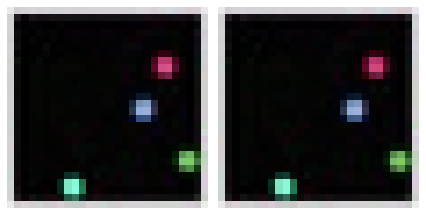

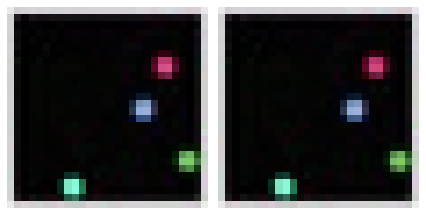

In [27]:
compare_images_as_video(Y[0:50, :], Y_hat[0:50, :])

In [191]:
def produce_long_videos(train=True, val=False, test=False):
    i = 0
    if train:
        i = random.randint(0, X_train.shape[0]-1)
    elif val:
        i = random.randint(0, X_val.shape[0]-1)
    elif test:
        i = random.randint(0, X_test.shape[0]-1)
    X, Y = [], []
    x, y = None, None
    if train:
        x = X_train[i, :20, :]
        y = X_train[i, 20:50, :]
    elif val:
        x = X_val[i, :20, :]
        y = X_val[i, 20:50, :]
    elif test:
        x = X_test[i, :20, :]
        y = X_test[i, 20:50, :]
    X.append(x)
    X = np.array(X)
    Y_hat = seq.model.predict(X)
    result = np.concatenate((X, Y_hat), axis=1)
    for j in range(1):
        X_in = result[:, -20:, :]
        Y_hat_out = seq.model.predict(X_in)
        result = np.concatenate((result, Y_hat_out), axis=1)    
    print(result.shape)
    Y_hat_decoded = ae.decode_series(result)
    if train:
        y = X_train[i, :result.shape[1], :]
    elif val:
        y = X_val[i, :result.shape[1], :]
    elif test:
        y = X_test[i, :result.shape[1], :]
    Y.append(y)
    Y = np.array(Y)    
    Y_decoded = ae.decode_series(Y)
    return Y_decoded[0], Y_hat_decoded[0]

In [197]:
Y_long, Y_hat_long = produce_long_videos(test=True)

(1, 80, 64)


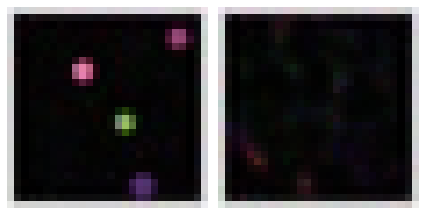

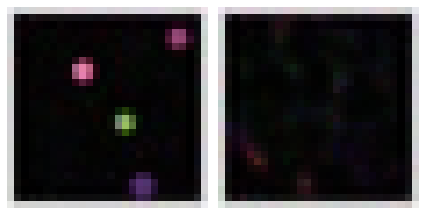

In [209]:
compare_images_as_video(Y_long, Y_hat_long)

In [247]:
"""
Conclusion:

We can learn a one to one mapping that predicts t+1 given t. However, if we just predict t+1 from t alone, the model fails
to roll out the future. However, if we initialize the model with the hidden and cell state from the last time step
we can accurately predict t+1 give t, h, and c. This is the interesting result of an RNN--a CNN or different architecture
could not unroll the future because it has no idea of hidden state and cell state. In an RNN, the hidden state and cell state
are updated with the trained weights in order to make a prediction for the next time step. Initialing our model's input
with t and the updated h and c from the model's last output is critical for an accurate prediction of t+1.

The model can unroll the future given just a single timestep, hidden state, and cell state. However, it fails to work well
on input with one, two, three balls. It works best on more balls. This leads me to believe that it should be trained with 
higher variance and higher quantity of data.
"""

"\nConclusion:\n\nWe can learn a one to one mapping that predicts t+1 given t. However, if we just predict t+1 from t alone, the model fails\nto roll out the future. However, if we initialize the model with the hidden and cell state from the last time step\nwe can accurately predict t+1 give t, h, and c. This is the interesting result of an RNN--a CNN or different architecture\ncould not unroll the future because it has no idea of hidden state and cell state. In an RNN, the hidden state and cell state\nare updated with the trained weights in order to make a prediction for the next time step. Initialing our model's input\nwith t and the updated h and c from the model's last output is critical for an accurate prediction of t+1.\n\nThe model can unroll the future given just a single timestep, hidden state, and cell state. However, it fails to work well\non input with one, two, three balls. It works best on more balls. This leads me to believe that it should be trained with \nhigher varian